In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
loan= pd.read_csv('C:/Users/hp/OneDrive/Desktop/Analytics/MSBA/BANA 273 - Machine Learning Analytics/Project/loan-train.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Preprocessing
- Replace Null Values
- Drop Loan_ID column
- Perform Label Encoding - In order to convert character variables, we have to enncode using Label Encoder

In [ ]:
loan.isnull().sum()

In [3]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [4]:
# in Categorical variables, replace the nulls with mode value
for col in categorical_columns:
    loan[col].fillna(loan[col].mode()[0],inplace=True)

# in Nnumeric variables, replcase nulls with mean values of each variable
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())

In [5]:
loan.drop('Loan_ID', axis = 1, inplace=True)

In [ ]:
loan.head()

## Calculating Gini Impurity Index for each of the attribute

In [ ]:
# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = loan['Loan_Status'].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of Loan_Status is {gini_class:.3f}')

In [ ]:
loan.columns[loan.columns != 'Loan_Status']

In [ ]:
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = loan[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = loan['Loan_Status'][loan[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = loan.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in loan.columns[loan.columns != 'Loan_Status']:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

In [ ]:
# STEP 3: 
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
max_value = max(gini_attiribute.values())
print('The maximum value of Gini Impurity : {0:.3} '.format(max_value))
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
discard_attribute = max(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)
print('The discarded attiribute is: ', discard_attribute)

In [6]:
# Assigning numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
loan['Gender'] = labelencoder.fit_transform(loan['Gender'])
loan['Married'] = labelencoder.fit_transform(loan['Married'])
loan['Dependents'] = labelencoder.fit_transform(loan['Dependents'])
loan['Education'] = labelencoder.fit_transform(loan['Education'])
loan['Self_Employed'] = labelencoder.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = labelencoder.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = labelencoder.fit_transform(loan['Loan_Status'])

loan.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


## Decision Tree with outliers and skewness

In [10]:
from sklearn .model_selection import train_test_split
#X=loan[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
#y=loan[['Loan_Status']]

X=loan[['Married','Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=45)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 9), (185, 9))

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', splitter='best')   # max depth for decition tree is level 3

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

In [12]:
from sklearn import metrics
from sklearn.metrics import classification_report
confusion_Matrix_Naive = metrics.confusion_matrix(y_test, y_pred_tree) 
print('Confusion Matrix:')
print(confusion_Matrix_Naive)
print('\n Accuracy of Decision Tree Classification: {:.4f} \n'.format(metrics.accuracy_score(y_test, y_pred_tree)))
print(classification_report(y_test, y_pred_tree))

Confusion Matrix:
[[ 33  28]
 [ 17 107]]

 Accuracy of Decision Tree Classification: 0.7568 

              precision    recall  f1-score   support

           0       0.66      0.54      0.59        61
           1       0.79      0.86      0.83       124

    accuracy                           0.76       185
   macro avg       0.73      0.70      0.71       185
weighted avg       0.75      0.76      0.75       185



# Running Decision Tree model without outliers and remove skewness (noise) in columns (ApplicantIncome, CoApplicantIncome and Loan_Amount), we perform binning
Since there is noise the data and the data is skewed to the right, we perform below two corrective actions:
1. Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data
2. Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

## Method1: Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data

In [13]:
#Remove outlier customers with outlying ApplicantIncome (above $30000 i.e. 7 customers)
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].count())
#plt.hist(loan['ApplicantIncome'][loan['ApplicantIncome']<30000], bins=10)

#Remove outlier customers with outlying CoaaplicantIncome (above $15000 i.e. 4 customers)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].count())
#plt.hist(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000], bins=10)

#Remove outlier customers with outlying loan amount (above $500 i.e. 5 customers)
print(loan['LoanAmount'][loan['LoanAmount']>500].count())
#plt.hist(loan['LoanAmount'][loan['LoanAmount']<500], bins=10)

7
4
5


In [14]:
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].index)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].index)
print(loan['LoanAmount'][loan['LoanAmount']>500].index)

Int64Index([155, 171, 183, 185, 333, 409, 443], dtype='int64')
Int64Index([402, 417, 581, 600], dtype='int64')
Int64Index([130, 155, 171, 369, 561], dtype='int64')


In [15]:
#Create dataset without outliers - drop rows 
loan_noOutliers = loan.copy()
loan_noOutliers.drop(loan_noOutliers['ApplicantIncome'][loan_noOutliers['ApplicantIncome']>30000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['CoapplicantIncome'][loan_noOutliers['CoapplicantIncome']>15000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['LoanAmount'][loan_noOutliers['LoanAmount']>500].index, inplace=True)

In [16]:
loan_noOutliers.shape

(600, 12)

In [ ]:
##Decision Tree without outliers and skewness-droppinng outliers (method1)

In [17]:
#Decisionn Tree - Without outliers- method2: using log function
#X=loan_noOutliers[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
#y=loan_noOutliers[['Loan_Status']]

X=loan_noOutliers[['Married','Dependents','Education','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan_noOutliers[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((420, 9), (180, 9))

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', splitter='best')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report
confusion_Matrix_Naive = metrics.confusion_matrix(y_test, y_pred_tree) 
print('Confusion Matrix:')
print(confusion_Matrix_Naive)
print('\n Accuracy of Decision Tree Classification: {:.4f} \n'.format(metrics.accuracy_score(y_test, y_pred_tree)))
print(classification_report(y_test, y_pred_tree))

Confusion Matrix:
[[ 34  25]
 [ 21 100]]

 Accuracy of Decision Tree Classification: 0.7444 

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        59
           1       0.80      0.83      0.81       121

    accuracy                           0.74       180
   macro avg       0.71      0.70      0.70       180
weighted avg       0.74      0.74      0.74       180



## Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

In [20]:
#Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

loan['TotalApplicantIncome']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan['TotalApplicantIncome']

# applying log function on TotalApplicantIncome & LoanAmount_log
loan['TotalApplicantIncome_log']=np.log(loan['TotalApplicantIncome'])    
loan['LoanAmount_log']=np.log(loan['LoanAmount'])

In [21]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,TotalApplicantIncome_log,LoanAmount_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,4.986426
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.714568,4.852030
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,4.189655
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,8.505323,4.787492
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515,4.948760


In [ ]:
loan.columns

In [ ]:
loan['TotalApplicantIncome_log'].hist(bins=10) 

In [ ]:
loan['LoanAmount_log'].hist(bins=10)

## Decision Tree without outliers and skewness-log function normalization (method 2)

In [ ]:
loan.columns

In [22]:
#Logistic Regression- Without outliers- method2: using log function
#X=loan[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','TotalApplicantIncome_log', 'LoanAmount_log','Credit_History','Property_Area']] 
X=loan[['Married','Dependents','Education','Loan_Amount_Term','TotalApplicantIncome_log', 'LoanAmount_log','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 8), (185, 8))

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', splitter='best')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report
confusion_Matrix_Naive = metrics.confusion_matrix(y_test, y_pred_tree) 
print('Confusion Matrix:')
print(confusion_Matrix_Naive)
print('\n Accuracy of Decision Tree Classification: {:.4f} \n'.format(metrics.accuracy_score(y_test, y_pred_tree)))
print(classification_report(y_test, y_pred_tree))

Confusion Matrix:
[[28 23]
 [37 97]]

 Accuracy of Decision Tree Classification: 0.6757 

              precision    recall  f1-score   support

           0       0.43      0.55      0.48        51
           1       0.81      0.72      0.76       134

    accuracy                           0.68       185
   macro avg       0.62      0.64      0.62       185
weighted avg       0.70      0.68      0.69       185



### Different ways of visualizing Decision Tree

In [25]:
#features=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
features=['Married','Dependents','Education', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
prediction=['Loan_Statues']

In [ ]:
#Steps to add Graphviz to your system environment path
#import os
#os.environ
#os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
#Method 1
import matplotlib.pyplot as plt
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

In [ ]:
#Method 2
import graphviz
dot_data = tree.export_graphviz(clf, 
                                feature_names=features)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
#Yes: 1, No: 0
loan['Loan_Status'][loan['LoanAmount']<=547.5][loan['Credit_History']<=0.5].value_counts()

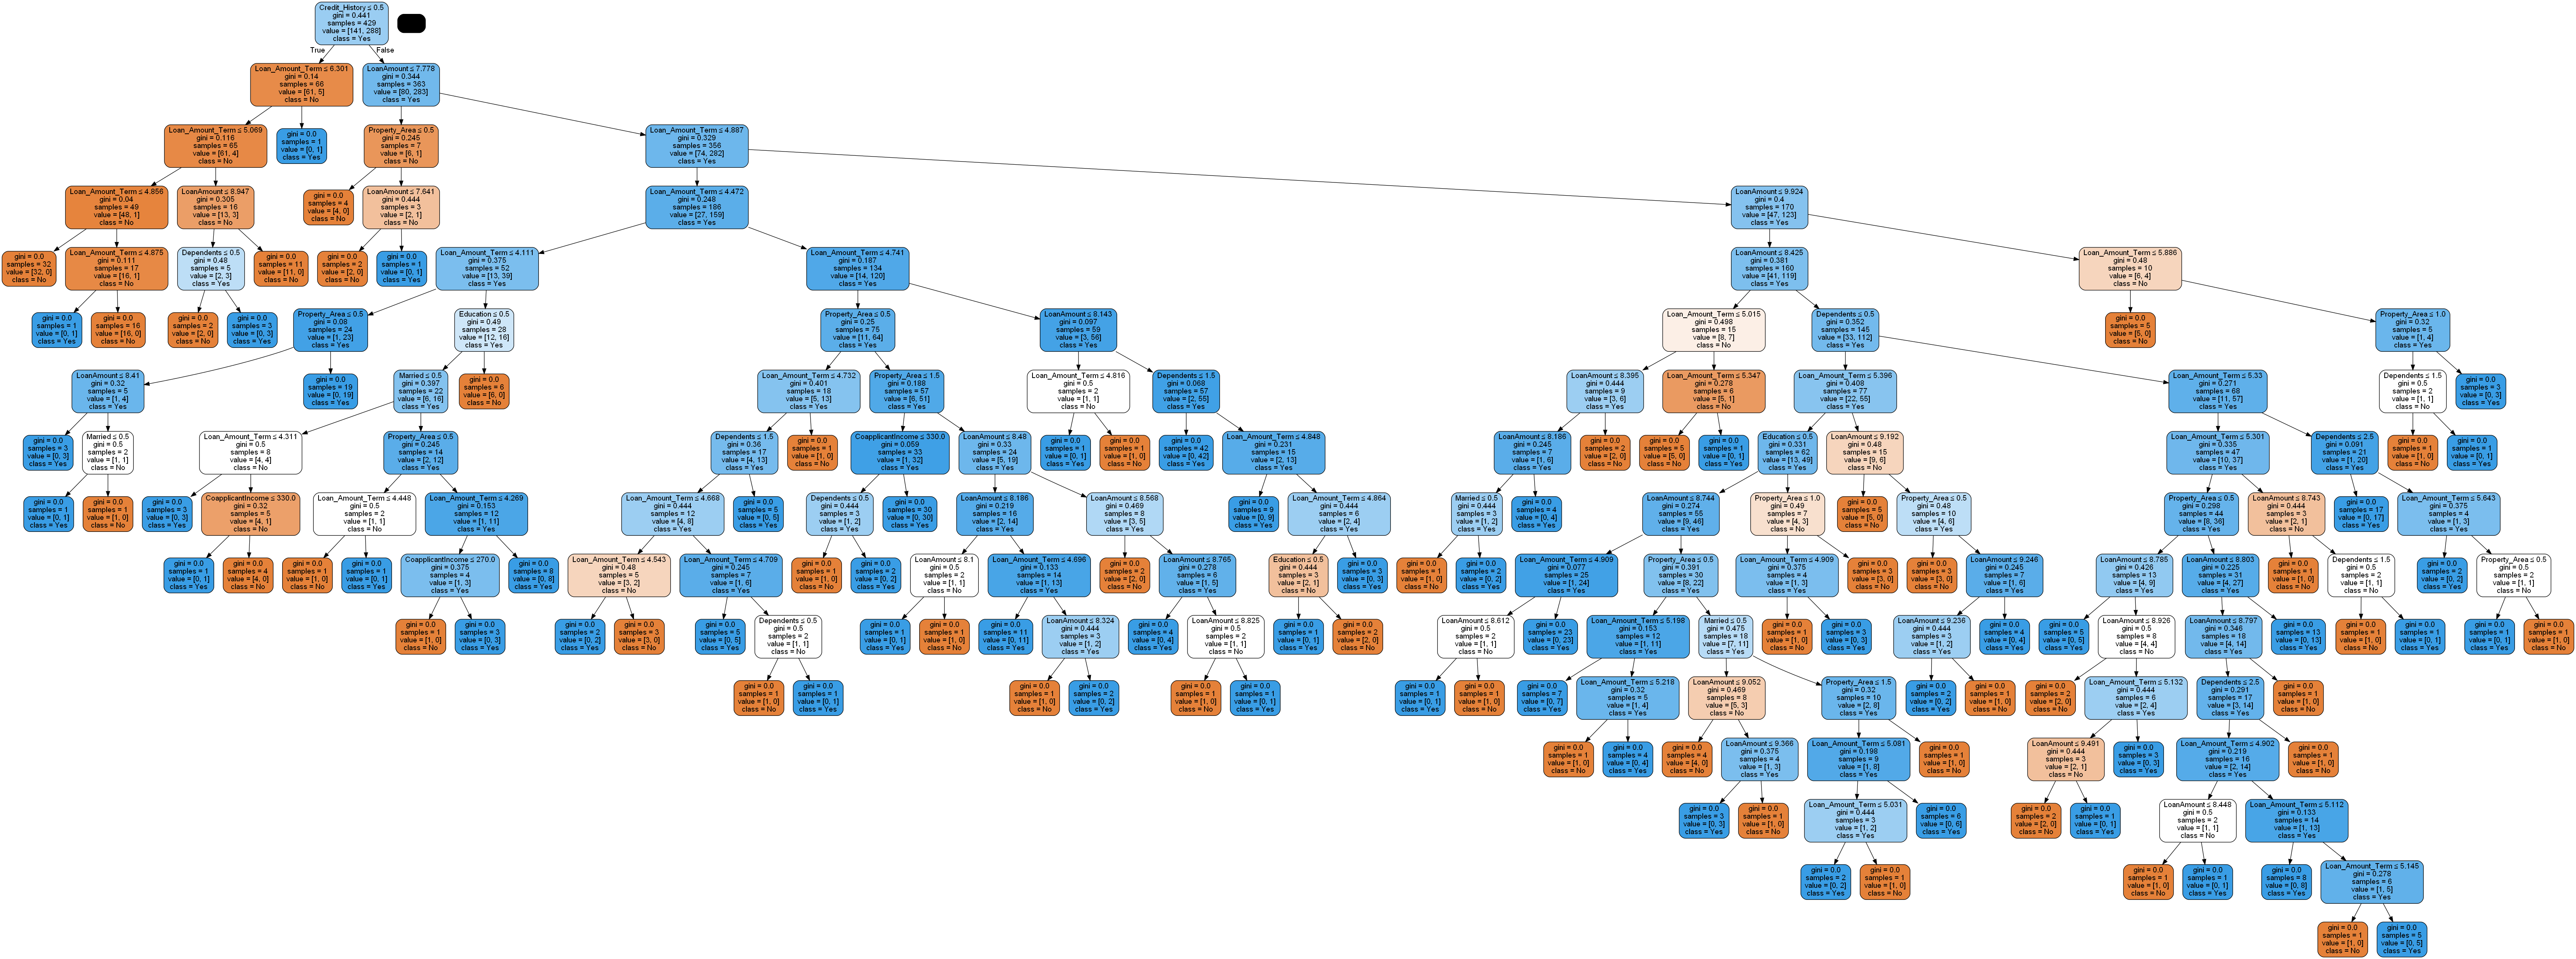

In [26]:
#Method 3 (Best)
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features, class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree-Loan-FeatureSelection.png')
Image(graph.create_png())

In [ ]:
#Method 4
import matplotlib.pyplot as plt
from sklearn import tree

features=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
prediction=['Loan_Statues']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,50), dpi=300,)
sub1=tree.plot_tree(clf, fontsize=14, class_names=['Yes','No'], feature_names=features)